In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [2]:
data_1 = pd.read_csv('chips.csv')

In [3]:
data_2 = pd.read_csv('geyser.csv')

In [4]:
X_1 = data_1.iloc[:,:-1].values
y_1 = data_1.iloc[:,-1:].values
X_2 = data_2.iloc[:,:-1].values
y_2 = data_2.iloc[:,-1:].values

In [5]:
y_1 = np.where( y_1=='P', 1, -1)
y_2 = np.where( y_2=='P', 1, -1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_1 = scaler.fit_transform(X_1)
X_2 = scaler.fit_transform(X_2)

In [9]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'base_estimator__max_depth':[i for i in range(1,11)],
              'base_estimator__min_samples_leaf':[5,10],
              'learning_rate':[0.01,0.1]}
dtree_model=DecisionTreeClassifier(random_state=1)
abc = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=55)
clf = GridSearchCV(abc, param_grid, n_jobs=-1)
clf.fit(X_1, np.ravel(y_1))
param_1 = clf.best_params_
param_1

Wall time: 3.52 s


{'base_estimator__max_depth': 1,
 'base_estimator__min_samples_leaf': 5,
 'learning_rate': 0.1}

accuracy = 0.5932203389830508


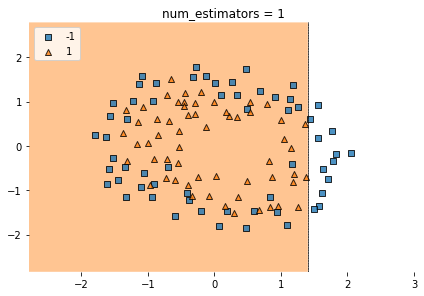

accuracy = 0.7033898305084746


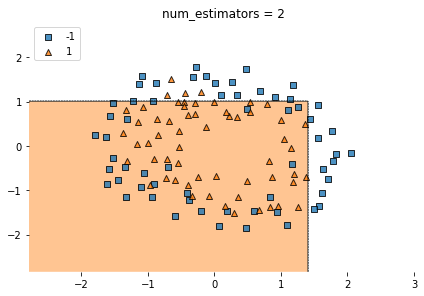

accuracy = 0.7033898305084746


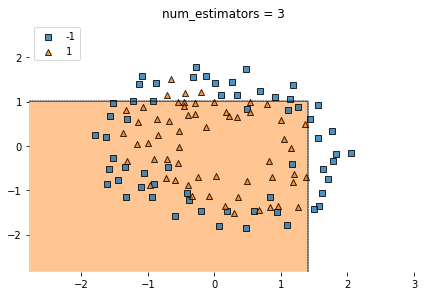

accuracy = 0.7711864406779662


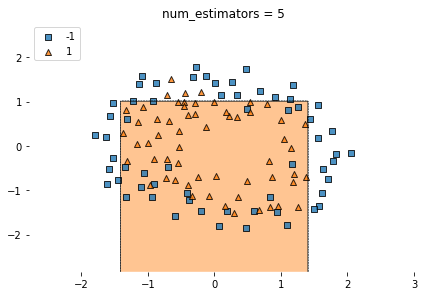

accuracy = 0.7711864406779662


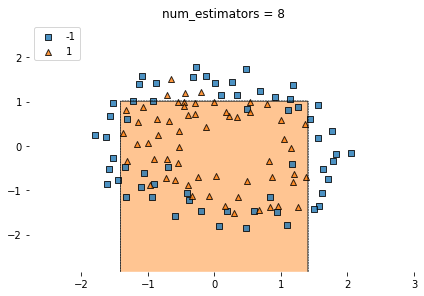

accuracy = 0.8305084745762712


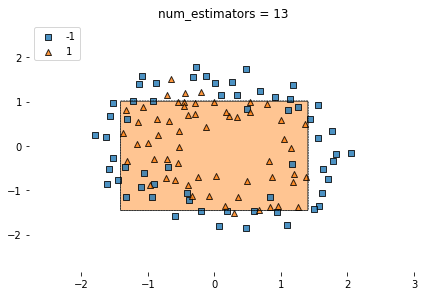

accuracy = 0.8305084745762712


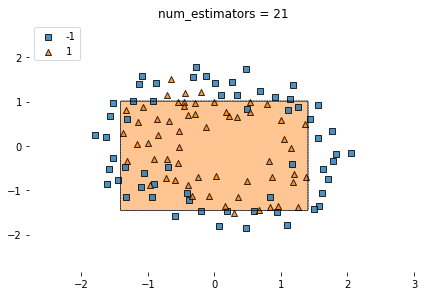

accuracy = 0.8305084745762712


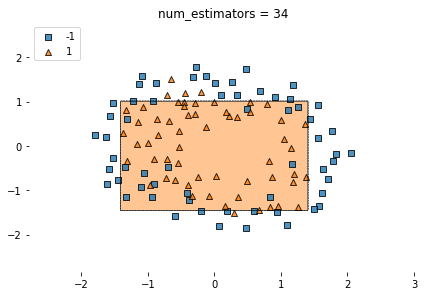

accuracy = 0.8559322033898306


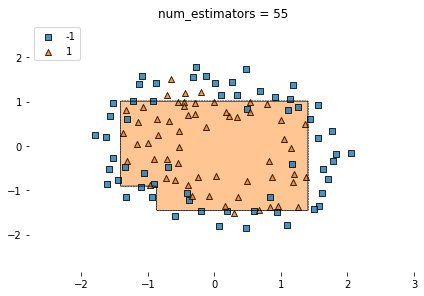

In [10]:
accuracy = []
for i in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
    dtree_model=DecisionTreeClassifier(random_state=1, max_depth = 1, min_samples_leaf = 5)
    abc = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=i, learning_rate =0.1)
    abc.fit(X_1, np.ravel(y_1))
    y_pred = abc.predict(X_1)
    accuracy.append(accuracy_score(y_1, y_pred))
    print('accuracy =', accuracy_score(y_1, y_pred))
    plot_decision_regions(X_1, np.ravel(y_1), clf=abc)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title('num_estimators = {id}'.format(id=i))
    plt.show()

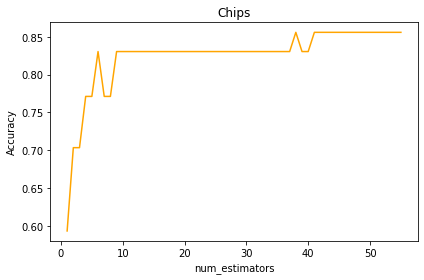

In [12]:
accuracy = []
for i in range(1, 56):
    dtree_model=DecisionTreeClassifier(random_state=1, max_depth = 1, min_samples_leaf = 5)
    abc = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=i, learning_rate =0.1)
    abc.fit(X_1, np.ravel(y_1))
    y_pred = abc.predict(X_1)
    accuracy.append(accuracy_score(y_1, y_pred))
plt.plot(range(1, 56), accuracy, c = 'orange')
plt.title('Chips')
plt.ylabel('Accuracy')
plt.xlabel("num_estimators")
plt.tight_layout()
plt.show()

In [23]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'base_estimator__max_depth':[i for i in range(1,11)],
              'base_estimator__min_samples_leaf':[5,10],
              'learning_rate':[0.01,0.1]}
dtree_model=DecisionTreeClassifier(random_state=1)
abc = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=55)
clf = GridSearchCV(abc, param_grid, n_jobs=-1)#, cv=[(slice(None), slice(None))])
clf.fit(X_2, np.ravel(y_2))
param_2 = clf.best_params_
param_2

Wall time: 1.95 s


{'base_estimator__max_depth': 6,
 'base_estimator__min_samples_leaf': 10,
 'learning_rate': 0.01}

accuracy = 0.9009009009009009


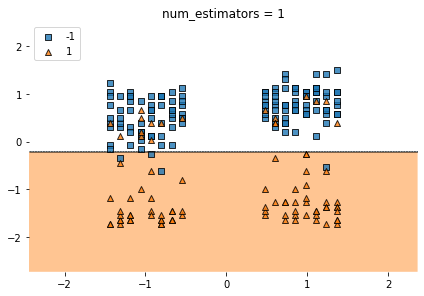

accuracy = 0.9009009009009009


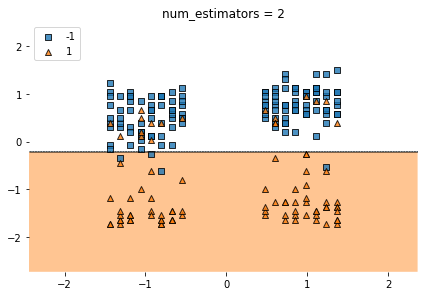

accuracy = 0.9009009009009009


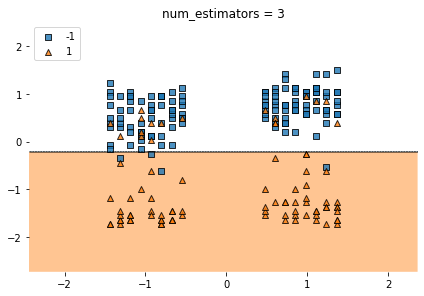

accuracy = 0.9009009009009009


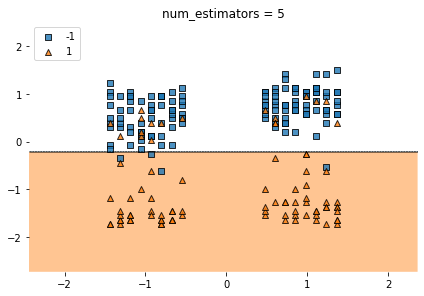

accuracy = 0.9009009009009009


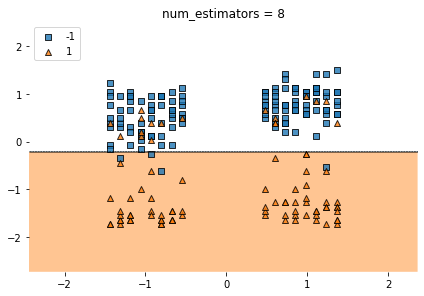

accuracy = 0.9009009009009009


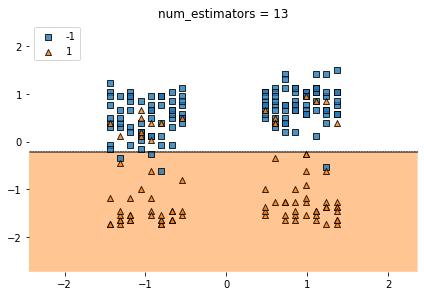

accuracy = 0.9009009009009009


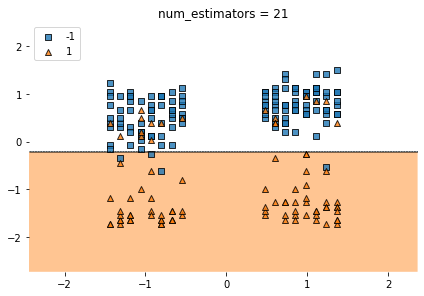

accuracy = 0.9144144144144144


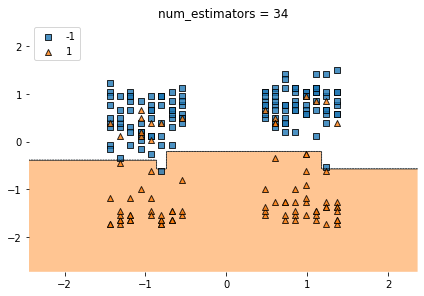

accuracy = 0.918918918918919


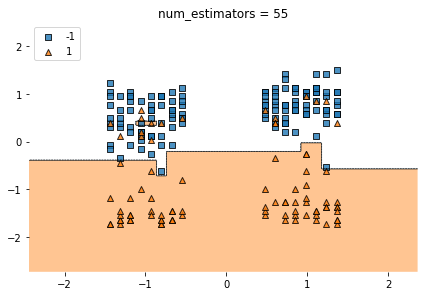

In [24]:
accuracy = []
for i in [1, 2, 3, 5, 8, 13, 21, 34, 55]:
    dtree_model=DecisionTreeClassifier(random_state=1, max_depth = 6, min_samples_leaf = 10)
    abc = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=i, learning_rate =0.01)
    abc.fit(X_2, np.ravel(y_2))
    y_pred = abc.predict(X_2)
    accuracy.append(accuracy_score(y_2, y_pred))
    print('accuracy =', accuracy_score(y_2, y_pred))
    plot_decision_regions(X_2, np.ravel(y_2), clf=abc)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title('num_estimators = {id}'.format(id=i))
    plt.show()

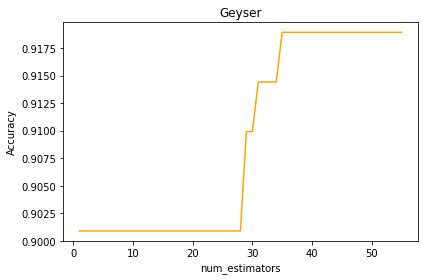

In [25]:
accuracy = []
for i in range(1, 56):
    dtree_model=DecisionTreeClassifier(random_state=1, max_depth = 6, min_samples_leaf = 10)
    abc = AdaBoostClassifier(base_estimator=dtree_model, n_estimators=i, learning_rate =0.01)
    abc.fit(X_2, np.ravel(y_2))
    y_pred = abc.predict(X_2)
    accuracy.append(accuracy_score(y_2, y_pred))
plt.plot(range(1, 56), accuracy, c = 'orange')
plt.title('Geyser')
plt.ylabel('Accuracy')
plt.xlabel("num_estimators")
plt.tight_layout()
plt.show()